# 1.1 Sample Space Analysis: An Equation-Free Approach for Measuring Uncertainty in Outcomes

A sample space is the set of all the possible outcomes that an action could produce. 

In [6]:
sample_space = {'Heads', 'Tails'}

In [7]:
probability_heads = 1 / len(sample_space)
print(f"Probability of choosing heads is {probability_heads}")

Probability of choosing heads is 0.5


What is the probability that the coin lands on either heads or on tails? What is the probability that the coin will spin forever in the air, landing on neither heads nor tails? To answer these we will need to define the concept of **events**. 

An **event** is the subset of those elements within sample_space that satisfy some **event condition**.

An **event condition** is a simple Boolean function whose input is a single sample_space element which returns True only if the element satisfies our condition constraints.

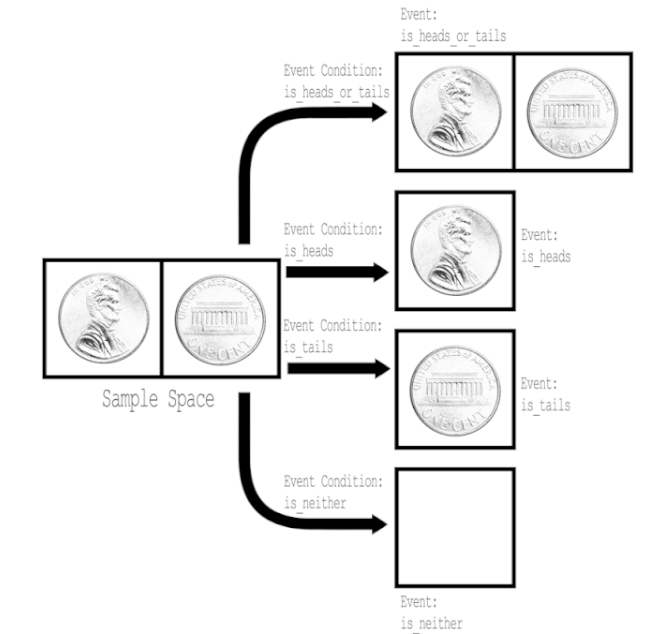

In [8]:
def is_heads_or_tails(outcome): return outcome in sample_space
def is_neither(outcome): return not is_heads_or_tails(outcome)
def is_heads(outcome): return outcome == "Heads"
def is_tails(outcome): return outcome == "Tails"

In [9]:
def get_event(event_condition, sample_space):
  return set([outcome for outcome in sample_space if event_condition(outcome)])

In [10]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [11]:
def compute_probability(event_condition, sample_space):
  event = get_event(event_condition, sample_space)
  return len(event) / len(sample_space)

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    probability = compute_probability(event_condition, sample_space)
    print(f'Probability: {probability}\n')

Event Condition: is_heads_or_tails
Probability: 1.0

Event Condition: is_heads
Probability: 0.5

Event Condition: is_tails
Probability: 0.5

Event Condition: is_neither
Probability: 0.0



## Analyzing a Biased Coin

How do we compute probabilities for a biased coin? We can create a weighted sample space.

In [12]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

In [13]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

In [14]:
# Checking the weighted event size

event = get_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [15]:
def compute_event_probability(event_condition, generic_sample_space):
  event = get_event(event_condition, generic_sample_space)
  if type(generic_sample_space) == type(set()):
    return len(event) / len(generic_sample_space)
  event_size = sum(generic_sample_space[outcome] for outcome in event)
  return event_size / sum(generic_sample_space.values())

In [16]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


# 1.2 Computing Non-Trivial Probabilities


Suppose a family has 4 children. What is the probability that exactly 2 of the children are boys?

In [17]:
from itertools import product

possible_children = ['Boy', 'Girl']

# Naive approach
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)

# Better approach
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space

# Best approach
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

In [18]:
len([children for children in sample_space if children == "Boy" ]) == 2

False

In [22]:
def has_two_boys(outcome): 
  num = len([child for child in outcome if child == 'Boy']) == 2
  return num

prob = compute_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys: {prob}")


Probability of 2 boys: 0.375


You have a 6 sided die whose faces are numbered from 1 to 6, the die is rolled 6 times. 

What is the probability that these 6 dice-rolls add up to 21?

In [23]:
numbers_on_die = list(range(1,7))

In [24]:
sample_space_die = set(product(numbers_on_die, repeat=6))

In [28]:
def add_up_to_21(outcome):
  return sum(outcome) == 21

In [45]:
prob = compute_event_probability(add_up_to_21, sample_space_die)
print(f"Probability that a dice-roll out of 6 dice rolls add up to 21: {prob:2f}")

Probability that a dice-roll out of 6 dice rolls add up to 21: 0.092850


In [46]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space_die)
print(f"Probability that a dice-roll out of 6 dice rolls add up to 21: {prob:2f}")

Probability that a dice-roll out of 6 dice rolls add up to 21: 0.092850


In [36]:
from collections import defaultdict

weighted_sample_space = defaultdict(int)
for outcome in sample_space_die:
  total = sum(outcome)
  weighted_sample_space[total] += 1

In [37]:
weighted_sample_space

defaultdict(int,
            {6: 1,
             7: 6,
             8: 21,
             9: 56,
             10: 126,
             11: 252,
             12: 456,
             13: 756,
             14: 1161,
             15: 1666,
             16: 2247,
             17: 2856,
             18: 3431,
             19: 3906,
             20: 4221,
             21: 4332,
             22: 4221,
             23: 3906,
             24: 3431,
             25: 2856,
             26: 2247,
             27: 1666,
             28: 1161,
             29: 756,
             30: 456,
             31: 252,
             32: 126,
             33: 56,
             34: 21,
             35: 6,
             36: 1})

In [39]:
num_combinations = weighted_sample_space.get(21)
print(f"There are {num_combinations } ways for six rolled dice to sum to 21")

There are 4332 ways for six rolled dice to sum to 21


In [41]:
prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
print(f"Probability that a dice-roll out of 6 dice rolls add up to 21: {prob:2f}")

Probability that a dice-roll out of 6 dice rolls add up to 21: 0.092850


In [42]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space_die))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


# 1.3 Computing Probabilities Over Interval Ranges

Now we will analyze event conditions that span across intervals of values. 

An interval is the set of all the numbers that are sandwiched between two boundary cutoffs.

In [43]:
def is_in_interval(number, minimum, maximum):
  return minimum <= number <= maximum

In [50]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10,21), weighted_sample_space)
print(f"Probability of the interval: {prob:2f}")

Probability of the interval: 0.544624


Interval analysis is critical to solving a whole class of very important problems in probability and statistics. 

One such problem involves the evaluation of extremes, the problem boils down to whether obeserved data is too extreme to be believable. 

Data seems extreme when it is too unusual to have occurred by random chance. For instance, suppose we observe 10 flips of an allegedly fair coin, and that coin lands on heads 8 out of 10 times. 

Now, we had expected the coin to hit tails half the time, not 20% of the time, so the observations seem a little strange. Is the coin actually fair? Or has it been secretly replaced with a trick coin that falls on heads a majority of the time? 

We’ll try to find out by asking the following question: what is the probability that 10 fair coin-flips lead to an extreme number of heads? We’ll define an extreme head-count as observing of 8 heads or more. 

Thus, we can describe the problem as follows: what is the probability that 10 fair coin-flips produce between 8 and 10 heads?

In [51]:
coin_sides = ['Heads', 'Tails']

In [57]:
from pprint import pprint

def generate_coin_sample_space(num_flips):
  weighted_sample_space_coins = defaultdict(int)
  combinations = set(product(coin_sides, repeat=num_flips))
  for combination in combinations:
    num_heads = len([combo for combo in combination if combo == "Heads"])
    weighted_sample_space_coins[num_heads] += 1
  return weighted_sample_space_coins
  
weighted_sample_space_coins = generate_coin_sample_space(10)
pprint(weighted_sample_space_coins)

defaultdict(<class 'int'>,
            {0: 1,
             1: 10,
             2: 45,
             3: 120,
             4: 210,
             5: 252,
             6: 210,
             7: 120,
             8: 45,
             9: 10,
             10: 1})


In [59]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8,10), weighted_sample_space_coins)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


Our observed head-count does not commonly occur. Does this mean the coin is biased? Not necessarily. Observing 8 out of 10 tails is as extreme as observing 8 out of 10 heads. 

Had we observed 8 tails and not 8 heads, we would still be suspicious of the coin. Our computed interval did not take this tails-driven extreme into account. 

Instead, we treated 8 or more tails as just another normal possibility. If we truly wish to measure the fairness of our coin, we’ll need to update our interval computations. 

We’ll need to include the likelihood of observing 8 or more tails. This is equivalent to observing 2 heads or less.

Let's formulate the problem as follows; what is the probability that 10 fair coin-flips produce either 0 to 2 heads or 8 to 10 heads? 

Or, stated more concisely, what is the probability that the coin-flips do NOT produce between 3 and 7 heads? 

In [64]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space_coins)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


In [66]:
weighted_sample_space_20_flips = generate_coin_sample_space(20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


The updated probability has dropped from approximately .1 to approximately .01. Thus, the added evidence has caused a 10-fold decrease in our confidence of fairness. 

Despite this probability drop, the ratio of heads to tails has remained constant at 4-to-1. Both our original and updated experiments produced 80% heads and 20% tails. This leads to an interesting an question: why does the probability of observing 80% or more heads decrease as the supposedly fair coin gets flipped more times? 

We can find out through detailed mathematical analysis. However, a much more intuitive solution is to just visualize the distribution of head-counts across our 2 sample space dictionaries. The visualization would effectively be a plot of keys (head-counts) vs values (combination counts) present in each dictionary. 

We can carry out this plot using Matplotlib; Python’s most popular visualization library. In the subsequent section, we will discuss Matplotlib usage, and its application to probability theory.